In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [2]:
ticker = 'PG' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')['Adj Close']

log_returns = np.log(1 + data.pct_change())

In [3]:
log_returns.tail()

,PG
Date,
2019-02-11,0.005715
2019-02-12,0.010024
2019-02-13,-0.000202
2019-02-14,-0.007891
2019-02-15,0.000203


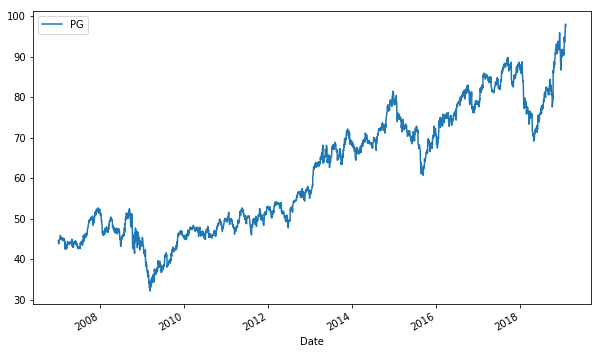

In [4]:
data.plot(figsize=(10, 6));

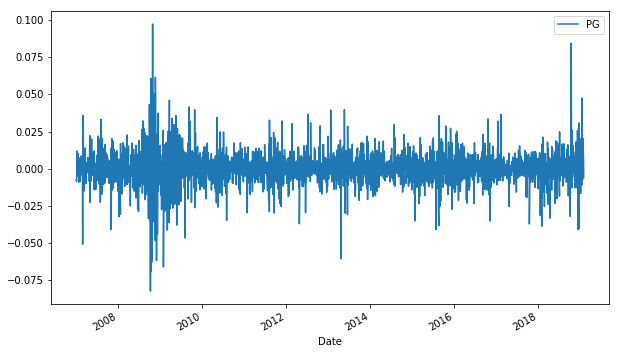

In [5]:
log_returns.plot(figsize = (10, 6))

In [6]:
u = log_returns.mean()
u

PG    0.000257
dtype: float64

In [7]:
var = log_returns.var()
var

PG    0.000121
dtype: float64

In [8]:
drift = u - (0.5 * var)
drift

PG    0.000196
dtype: float64

In [9]:
stdev = log_returns.std()
stdev

PG    0.011019
dtype: float64

******

In [10]:
type(drift)

pandas.core.series.Series

In [11]:
type(stdev)

pandas.core.series.Series

In [12]:
np.array(drift)

array([0.00019633])

In [13]:
drift.values

array([0.00019633])

In [14]:
stdev.values

array([0.01101926])

In [15]:
norm.ppf(0.95)

1.6448536269514722

In [16]:
x = np.random.rand(10, 2)
x

array([[0.08878566, 0.22450047],
       [0.44014573, 0.3361405 ],
       [0.55062414, 0.08517437],
       [0.96222032, 0.49880369],
       [0.31327129, 0.70308474],
       [0.853457  , 0.1707235 ],
       [0.46323554, 0.22955225],
       [0.10520584, 0.71006096],
       [0.07883394, 0.75705846],
       [0.32542272, 0.24489376]])

In [17]:
norm.ppf(x)

array([[-1.34827077, -0.75708166],
       [-0.15059976, -0.42301955],
       [ 0.12723839, -1.37108409],
       [ 1.77705398, -0.00299872],
       [-0.48659892,  0.53329335],
       [ 1.05137585, -0.95131008],
       [-0.09228566, -0.74032221],
       [-1.25243423,  0.55356281],
       [-1.41295863,  0.69687171],
       [-0.452588  , -0.69064682]])

In [18]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.1394868 , -0.21529911],
       [ 0.94506189, -0.08659924],
       [-0.02951846, -1.18677861],
       [-0.2385974 ,  1.06443524],
       [ 0.00204871,  0.02084353],
       [ 1.21700052,  0.48694611],
       [-1.55165442,  0.54907898],
       [-0.8629527 , -0.64718859],
       [ 0.86017494,  0.90254707],
       [-0.58130883, -0.96978999]])

In [19]:
t_intervals = 1000
iterations = 10

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [20]:
daily_returns

array([[0.99744998, 0.99300316, 1.01457556, ..., 1.00185475, 1.00117255,
        0.98028759],
       [0.99527926, 1.00882928, 1.00228343, ..., 0.99507094, 0.99846566,
        1.01423113],
       [1.00467476, 0.98511219, 1.00558735, ..., 1.00206891, 0.99251288,
        0.98532707],
       ...,
       [1.00001909, 1.01394911, 0.98871467, ..., 0.9933316 , 1.01035505,
        1.00528998],
       [1.00582126, 0.99380814, 0.98717822, ..., 0.98913733, 1.0022714 ,
        0.99583982],
       [1.00134964, 0.9980655 , 0.99669664, ..., 1.00481303, 0.98484058,
        0.98857775]])

***

$$
S_t = S_0 \mathbin{\cdot} daily\_return_t
$$
<br />

$$
S_{t+1} = S_t \mathbin{\cdot} daily\_return_{t+1}
$$

<br /> 
$$...$$
<br />  

$$
S_{t+999} = S_{t+998} \mathbin{\cdot} daily\_return_{t+999}
$$



In [21]:
S0 = data.iloc[-1]
S0

PG    97.440002
Name: 2019-02-05 00:00:00, dtype: float64

In [22]:
price_list = np.zeros_like(daily_returns)

In [23]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
price_list[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
price_list[0] = S0
price_list

array([[97.44000244, 97.44000244, 97.44000244, ..., 97.44000244,
        97.44000244, 97.44000244],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [26]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [27]:
price_list

array([[ 97.44000244,  97.44000244,  97.44000244, ...,  97.44000244,
         97.44000244,  97.44000244],
       [ 96.98001308,  98.30032771,  97.66249963, ...,  96.95971454,
         97.29049604,  98.82668335],
       [ 97.43337126,  96.83685075,  98.20817437, ...,  97.1603154 ,
         96.56207048,  97.37660672],
       ...,
       [133.74825644, 110.66914228, 104.09306568, ...,  90.07552223,
        131.07898562, 135.70876098],
       [134.52683959, 109.98389396, 102.75840748, ...,  89.09706116,
        131.37671866, 135.14418773],
       [134.70840278, 109.77112978, 102.41895952, ...,  89.52588831,
        129.38512422, 133.60053735]])

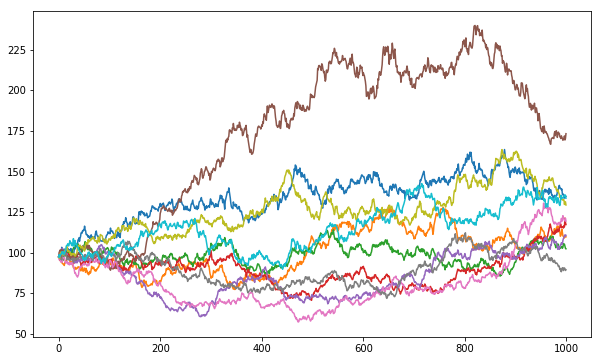

In [28]:
plt.figure(figsize=(10,6))
plt.plot(price_list);